In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sns.set_style("whitegrid")

In [9]:
df = pd.read_csv(r"C:\Users\leshe\Downloads\german_credit_data (1).csv")

In [10]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [12]:
df.shape

(1000, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df["Job"].unique()

array([2, 1, 3, 0])

In [18]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [22]:
df = df.dropna().reset_index(drop=True)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [23]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

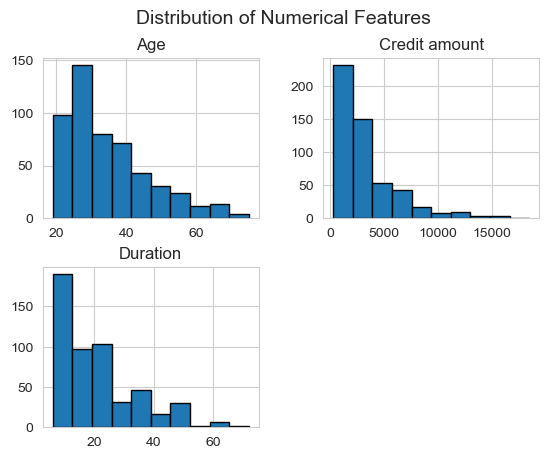

In [36]:
df[["Age", "Credit amount" , "Duration"]].hist(bins= 10, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize = 14)
plt.show()

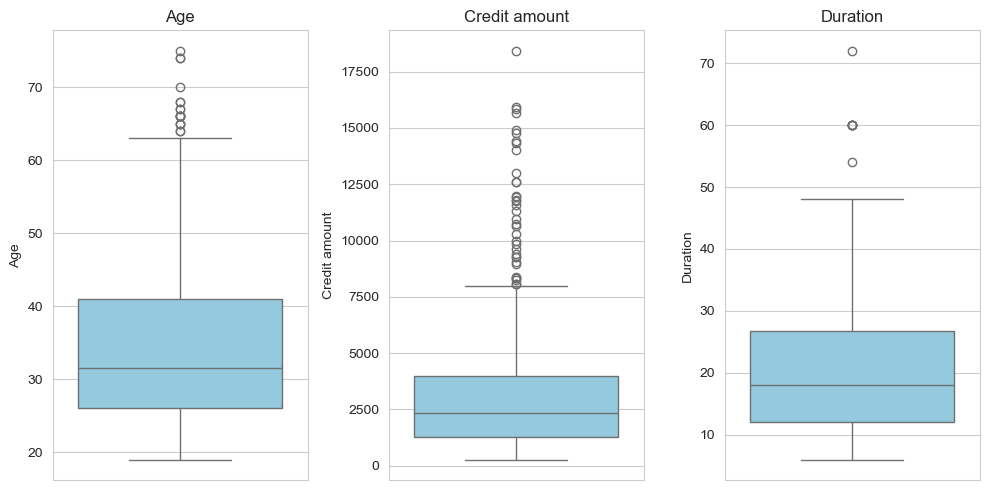

In [39]:
plt.figure(figsize = (10,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i + 1)
    sns.boxplot(y= df[col], color = "skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [41]:
df.query("Duration >= 50")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
54,58,male,2,rent,little,moderate,15945,54,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [46]:
categorical_cols = ["Sex" , "Job" , "Housing" , "Saving accounts" , "Purpose"]

C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\2939383111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col, palette= "Set2", order = df[col].value_counts().index)
C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\2939383111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col, palette= "Set2", order = df[col].value_counts().index)
C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\2939383111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col, palette= "Set2", order = df[col].value_count

<function matplotlib.pyplot.show(close=None, block=None)>

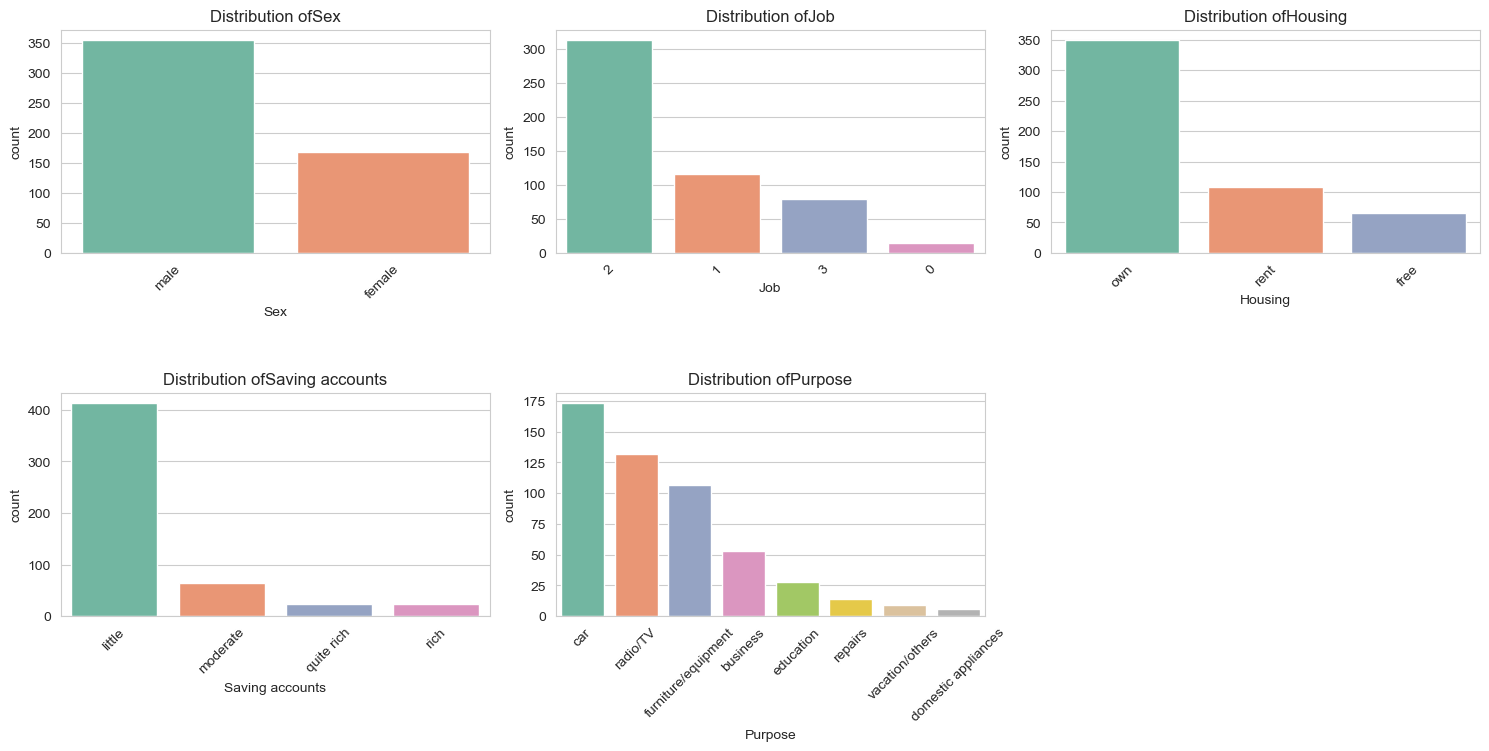

In [48]:
plt.figure(figsize = (15, 10))
for i , col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data= df, x=col, palette= "Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of{col}")
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show

In [49]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [50]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


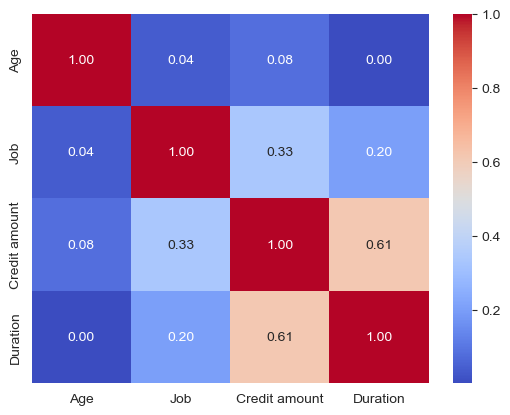

In [51]:
sns.heatmap(corr, annot=True, cmap = "coolwarm", fmt = ".2f")
plt.show()

In [52]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [53]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [54]:
pd.pivot_table(df,values="Credit amount", index = "Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


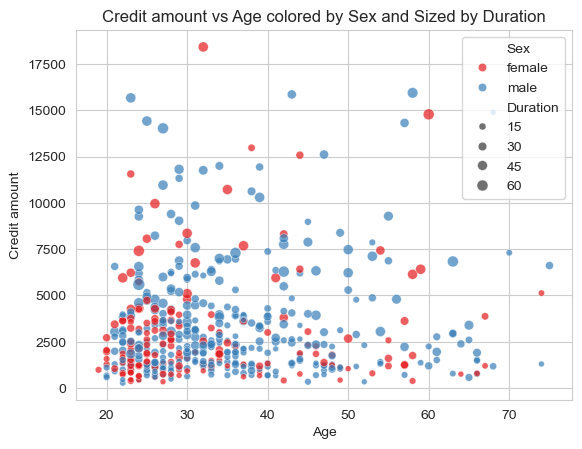

In [57]:
sns.scatterplot(data = df, x="Age", y= "Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex and Sized by Duration")
plt.show()

C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\4226977437.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x= "Saving accounts", y= "Credit amount", palette="Pastel1")


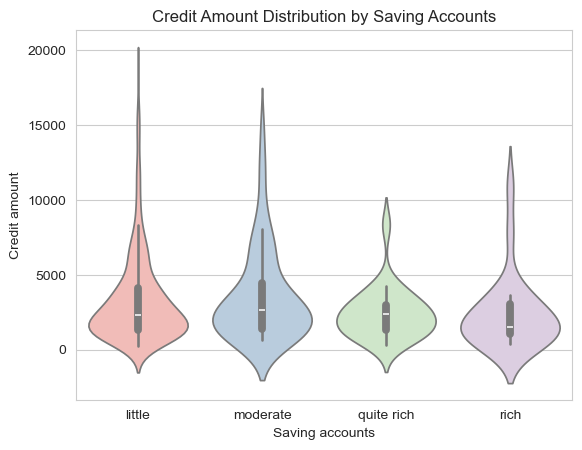

In [60]:
sns.violinplot(data = df, x= "Saving accounts", y= "Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [62]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

In [64]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Purpose']

C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\3984292072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\3984292072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
C:\Users\leshe\AppData\Local\Temp\ipykernel_4448\3984292072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")


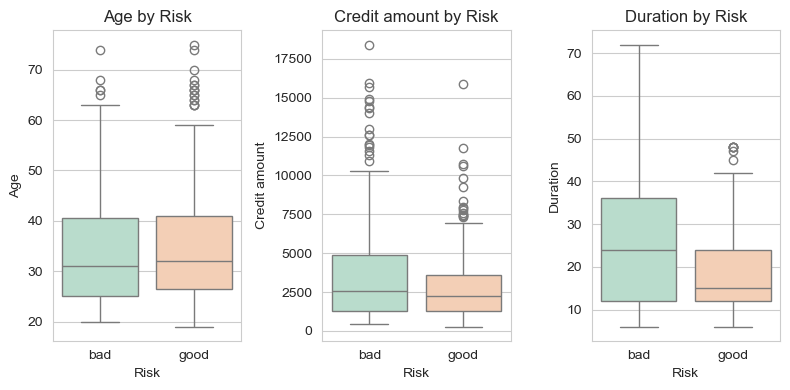

In [70]:
plt.figure(figsize = (8, 4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3, i+1)
    sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [72]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [73]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Purpose']

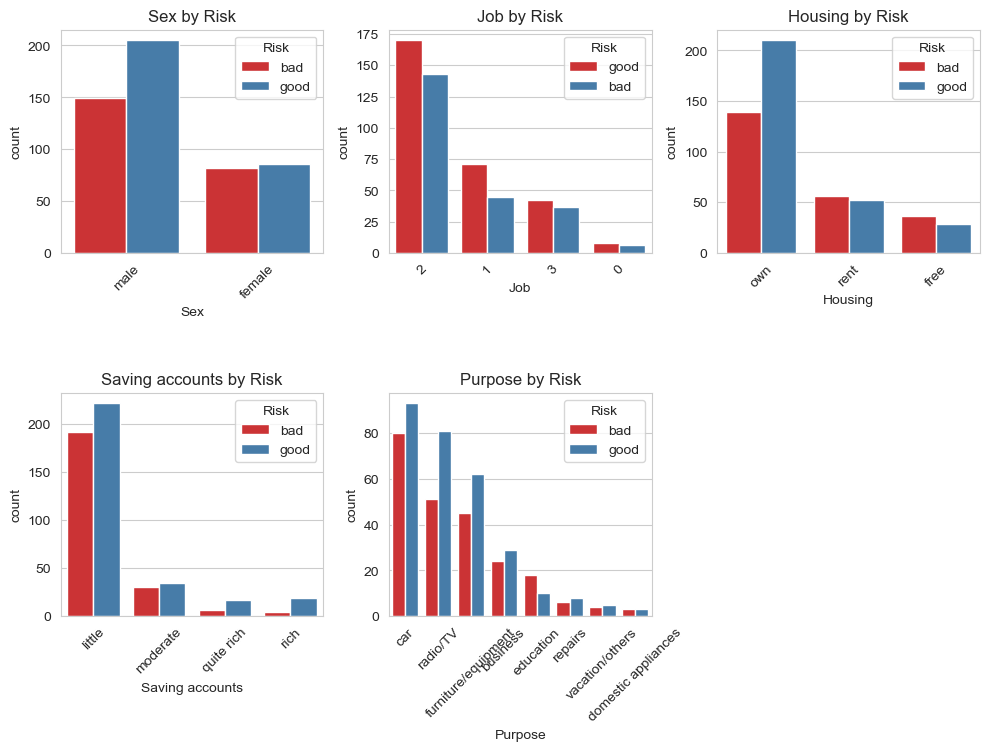

In [79]:
plt.figure(figsize = (10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3 ,3, i + 1)
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()